<a href="https://colab.research.google.com/github/pcamelogr-cell/An-lisis-Exploratorio-sobre-C-ncer-de-Pulm-n/blob/main/C%C3%A1ncer_de_P%C3%BAlmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Final - Cancer de Pulmon**


# 1. Carga e inspección inicial de los datos:

En esta sección se realiza la carga del dataset y hacemos una primera exploración de su estructura.
Identificamos el tamaño del dataset, revisamos los tipos de variables presentes y obtenemos un resumen estadístico de las principales columnas.


 Estos pasos nos permitiran comprender la composición inicial de los datos y detectar posibles inconsistencias o valores atípicos relevantes para el análisis del mismo.


In [173]:
# Primero damos acceso a drive, para acceder al archivo xlsx
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
%cd "/content/drive/MyDrive/Proyecto_Programacion_II"

/content/drive/MyDrive/Proyecto_Programacion_II


In [175]:
# Observamos que haya cargado el archivo correcto
!ls

'Cancer de pulmon.xlsx'


In [176]:
#Importamos las librerias necesarias para hacer nuestro analisis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos nuestro dataset

df = pd.read_excel("Cancer de pulmon.xlsx")
df.head(20)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
5,6,50.0,Male,Italy,2023-01-02,Stage I,No,Never Smoked,37.6,274,1,0,0,0,Radiation,2024-12-27,0
6,7,49.0,Female,Croatia,2018-05-21,Stage III,Yes,Passive Smoker,43.1,259,0,0,0,0,Radiation,2019-05-06,1
7,8,51.0,Male,Denmark,2017-02-18,Stage IV,Yes,Former Smoker,25.8,195,1,1,0,0,Combined,2017-08-26,0
8,9,64.0,Male,Sweden,2021-03-21,Stage III,Yes,Current Smoker,21.5,236,0,0,0,0,Chemotherapy,2022-03-07,0
9,10,56.0,Male,Hungary,2021-11-30,Stage IV,Yes,Current Smoker,17.3,183,1,0,0,1,Surgery,2023-11-29,0


In [177]:
# Miramos la cantidad de columnas y de filas.
df.shape

(890000, 17)

In [178]:
#Hechamos un vistazo general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  890000 non-null  int64         
 1   age                 890000 non-null  float64       
 2   gender              890000 non-null  object        
 3   country             890000 non-null  object        
 4   diagnosis_date      890000 non-null  datetime64[ns]
 5   cancer_stage        890000 non-null  object        
 6   family_history      890000 non-null  object        
 7   smoking_status      890000 non-null  object        
 8   bmi                 890000 non-null  float64       
 9   cholesterol_level   890000 non-null  int64         
 10  hypertension        890000 non-null  int64         
 11  asthma              890000 non-null  int64         
 12  cirrhosis           890000 non-null  int64         
 13  other_cancer        890000 no

In [179]:
#Observamos el tipo de variable que tenemos
df.dtypes

,0
id,int64
age,float64
gender,object
country,object
diagnosis_date,datetime64[ns]
cancer_stage,object
family_history,object
smoking_status,object
bmi,float64
cholesterol_level,int64


# 2. Manejo de datos faltantes:
Como primer ejercicio de exploración de datos, se realizará la estandarización de los nombres de las columnas, convirtiéndolos a minúsculas para facilitar su manipulación y mantener una sintaxis consistente a lo largo del análisis.

El siguiente paso consiste en identificar los valores faltantes presentes en cada columna, con el fin de determinar si es necesario aplicar algún método de imputación o proceder con la eliminación de filas y columnas afectadas.

In [180]:
# Observamos valores faltantes
df.isnull().sum()

,0
id,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0


In [181]:
# Porcentaje de los datos faltantes
(df.isnull().sum() / len(df)) * 100

,0
id,0.0
age,0.0
gender,0.0
country,0.0
diagnosis_date,0.0
cancer_stage,0.0
family_history,0.0
smoking_status,0.0
bmi,0.0
cholesterol_level,0.0


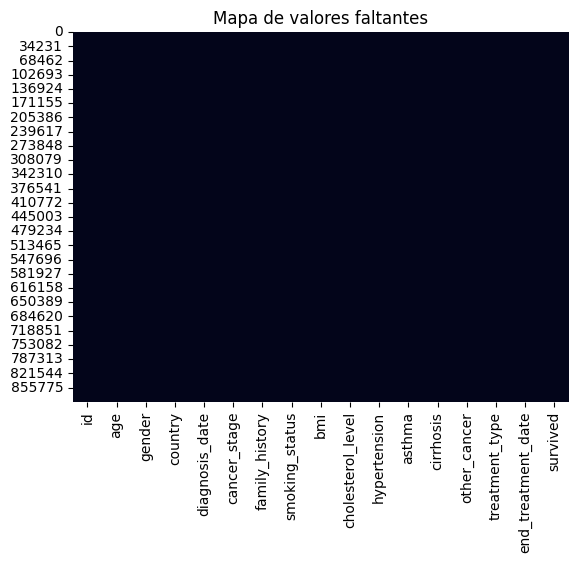

In [182]:
# Visualizacion de datos faltantes
sns.heatmap(df.isnull(), cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

Tras la inspección inicial del dataset, se confirmó que no existen valores nulos en ninguna de las columnas. Por lo tanto, no fue necesario realizar procesos de imputación ni eliminar registros. Con esto en cuenta, el conjunto de datos se mantiene completo, compuesto por 890.000 filas y 17 variables totalmente disponibles y listas para el análisis.

# 3. Identificación de outliers:

En esta sección se realizará la detección de valores atípicos en las variables relevantes del dataset. Este proceso permite identificar datos que se alejan significativamente del comportamiento general y que podrían influir de manera negativa en el análisis o en modelos posteriores.

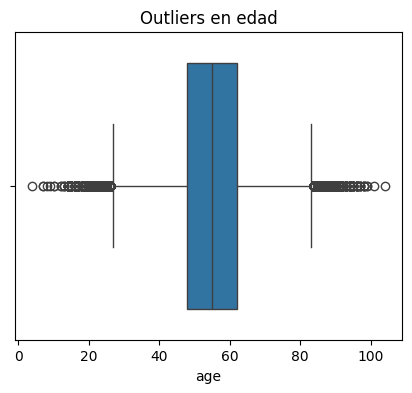

In [183]:
# Valores atipicos en la edad
plt.figure(figsize=(5,4))
sns.boxplot(x=df["age"])
plt.title("Outliers en edad")
plt.show()

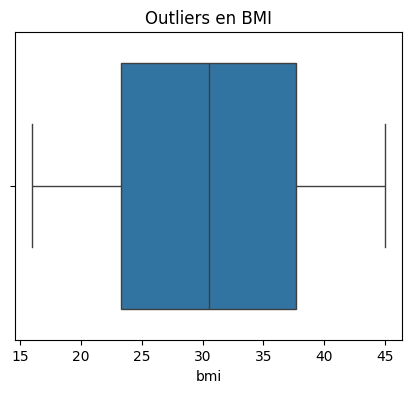

In [184]:
# Valores atipicos en el indice de masa muscular
plt.figure(figsize=(5,4))
sns.boxplot(x=df["bmi"])
plt.title("Outliers en BMI")
plt.show()

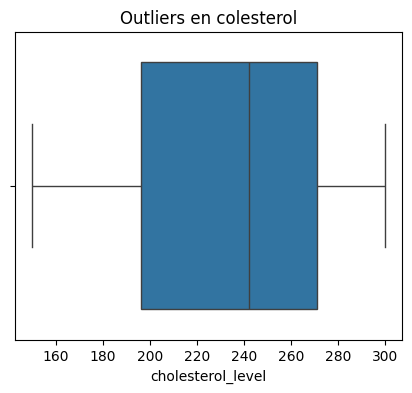

In [185]:
# Valores atipicos en el nivel del colesterol
plt.figure(figsize=(5,4))
sns.boxplot(x=df["cholesterol_level"])
plt.title("Outliers en colesterol")
plt.show()

# 4. Tratamiento de valores inconsistentes en texto y duplicados:

En esta sección se revisará la estructura de las variables textuales para identificar posibles inconsistencias, como diferencias en mayúsculas, errores de escritura o formatos no uniformes. Además, se evaluará si es necesario convertir ciertas variables numéricas de tipo float a entero para representar correctamente su naturaleza. Finalmente, se llevará a cabo la detección y el tratamiento de posibles registros duplicados con el fin de garantizar la integridad y coherencia del dataset.

In [186]:
# Hacemos un analisis estadistico para ver como se comportan las variables numericas.
df.describe()

,id,age,diagnosis_date,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived
count,890000.000000,890000.000000,890000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000,890000.000000
mean,445000.500000,55.007008,2019-06-02 01:22:51.494831616,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,2020-09-02 03:28:22.953708544,0.220229
min,1.000000,4.000000,2014-06-02 00:00:00,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,2014-12-02 00:00:00,0.000000
25%,222500.750000,48.000000,2016-12-01 00:00:00,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,2018-03-06 00:00:00,0.000000
50%,445000.500000,55.000000,2019-06-04 00:00:00,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,2020-09-03 00:00:00,0.000000
75%,667500.250000,62.000000,2021-12-01 00:00:00,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,2023-03-03 00:00:00,0.000000
max,890000.000000,104.000000,2024-05-30 00:00:00,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,2026-05-30 00:00:00,1.000000
std,256921.014128,9.994485,NaN,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,NaN,0.414401


A partir del análisis estadístico inicial podemos observar que las variables numéricas presentan rangos y valores coherentes, lo que indica que no requieren transformaciones adicionales.


In [187]:
# Miramos los datos duplicados
df.duplicated().sum()

np.int64(0)

In [188]:
# Miramos que no hayan identificaciones repetidas
len(df["id"].unique())

890000

In [189]:
# Miramos las variables
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [190]:
# Acá hicimos estandarizacion de datos

df["gender"] = df["gender"].str.lower().str.strip()
df["country"] = df["country"].str.lower().str.strip()
df["cancer_stage"] = df["cancer_stage"].str.lower().str.strip()
df["family_history"] = df["family_history"].str.lower().str.strip()
df["smoking_status"] = df["smoking_status"].str.lower().str.strip()
df["treatment_type"] = df["treatment_type"].str.lower().str.strip()
df.head(20)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,male,sweden,2016-04-05,stage i,yes,passive smoker,29.4,199,0,0,1,0,chemotherapy,2017-09-10,0
1,2,50.0,female,netherlands,2023-04-20,stage iii,yes,passive smoker,41.2,280,1,1,0,0,surgery,2024-06-17,1
2,3,65.0,female,hungary,2023-04-05,stage iii,yes,former smoker,44.0,268,1,1,0,0,combined,2024-04-09,0
3,4,51.0,female,belgium,2016-02-05,stage i,no,passive smoker,43.0,241,1,1,0,0,chemotherapy,2017-04-23,0
4,5,37.0,male,luxembourg,2023-11-29,stage i,no,passive smoker,19.7,178,0,0,0,0,combined,2025-01-08,0
5,6,50.0,male,italy,2023-01-02,stage i,no,never smoked,37.6,274,1,0,0,0,radiation,2024-12-27,0
6,7,49.0,female,croatia,2018-05-21,stage iii,yes,passive smoker,43.1,259,0,0,0,0,radiation,2019-05-06,1
7,8,51.0,male,denmark,2017-02-18,stage iv,yes,former smoker,25.8,195,1,1,0,0,combined,2017-08-26,0
8,9,64.0,male,sweden,2021-03-21,stage iii,yes,current smoker,21.5,236,0,0,0,0,chemotherapy,2022-03-07,0
9,10,56.0,male,hungary,2021-11-30,stage iv,yes,current smoker,17.3,183,1,0,0,1,surgery,2023-11-29,0


Con los .unique() estamos verificando los distintos valores de las columnas.

In [191]:
df["gender"].unique()

array(['male', 'female'], dtype=object)

In [192]:
df["country"].unique()

array(['sweden', 'netherlands', 'hungary', 'belgium', 'luxembourg',
       'italy', 'croatia', 'denmark', 'malta', 'germany', 'poland',
       'ireland', 'romania', 'spain', 'greece', 'estonia', 'cyprus',
       'france', 'slovenia', 'latvia', 'portugal', 'austria',
       'czech republic', 'finland', 'lithuania', 'slovakia', 'bulgaria'],
      dtype=object)

In [193]:
df["treatment_type"].unique()

array(['chemotherapy', 'surgery', 'combined', 'radiation'], dtype=object)

In [194]:
df["smoking_status"].unique()

array(['passive smoker', 'former smoker', 'never smoked',
       'current smoker'], dtype=object)

In [195]:
df["cancer_stage"].unique()

array(['stage i', 'stage iii', 'stage iv', 'stage ii'], dtype=object)

Luego de revisar los valores categóricos y verificar la presencia de duplicados, se confirma que el dataset no contiene registros repetidos y mantiene un formato consistente, por lo que los datos están listos para continuar con el análisis.

# 5. Creación de variables:

Con el fin de enriquecer el análisis y obtener información más representativa a partir de las variables del dataset original, se generaron dos nuevas variables derivadas de las columnas numéricas existentes.

1. Variable **Año desde el diagnostico**

In [196]:
# Creamos la variable "años desde el diagnostico" usando el dia que se diagnostico y la fecha que termino el tratamiento.
df["diagnosis_date"] = pd.to_datetime(df["diagnosis_date"])
df["end_treatment_date"] = pd.to_datetime(df["end_treatment_date"])
df["years_since_diagnosis"] = (pd.to_datetime("today") - df["diagnosis_date"]).dt.days / 365
df["years_since_diagnosis"] = df["years_since_diagnosis"].round(1)
print(df["years_since_diagnosis"].head(20))

0      9.6
1      2.6
2      2.6
3      9.8
4      2.0
5      2.9
6      7.5
7      8.8
8      4.7
9      4.0
10     1.9
11     6.0
12     1.5
13     3.3
14     2.6
15     4.3
16     5.7
17     8.3
18    10.3
19    11.4
Name: years_since_diagnosis, dtype: float64


In [197]:
# Sacamos las medidas de tendencia central
print(df["years_since_diagnosis"].describe())
print(f"Moda: {df['years_since_diagnosis'].mode()[0]}")

count    890000.000000
mean          6.476558
std           2.887759
min           1.500000
25%           4.000000
50%           6.500000
75%           9.000000
max          11.500000
Name: years_since_diagnosis, dtype: float64
Moda: 3.2


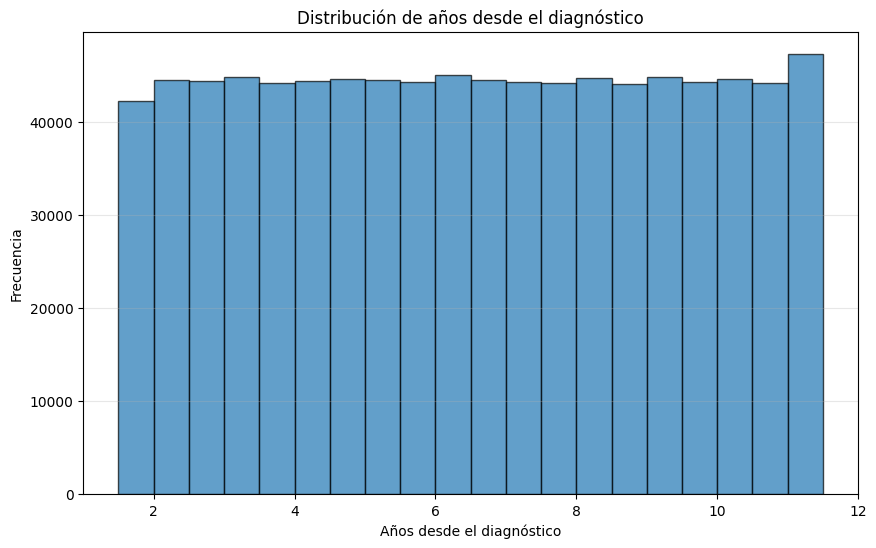

In [198]:
plt.figure(figsize=(10, 6))
plt.hist(df["years_since_diagnosis"], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Años desde el diagnóstico")
plt.ylabel("Frecuencia")
plt.title("Distribución de años desde el diagnóstico")
plt.grid(axis='y', alpha=0.3)
plt.show() #distribución uniforme

Distribuicion uniforme, esto quiere decir que el proyecto contiene una representación constante y equitativa de pacientes diagnosticados en todos los intervalos de tiempo dentro del dataset.

2. Variable **Paciente de alto riesgo**

In [199]:
# usamos todas las variables binarias de que otras enfermedades padece para ver si es un paciente de alto riesgo
df["comorbidity_index"] = df["hypertension"] + df["asthma"] + df["cirrhosis"] + df["other_cancer"]

# Agrupacion de edad, y si su etapa de cancer es la mas alta.
df["high_risk_patient"] = (
    (df["age"] > 70) |
    (df["comorbidity_index"] >= 2) |
    (df["cancer_stage"] == 'stage iv')
).astype(int)
print(df["high_risk_patient"].head(20))
print()

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     1
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    1
16    0
17    0
18    1
19    1
Name: high_risk_patient, dtype: int64



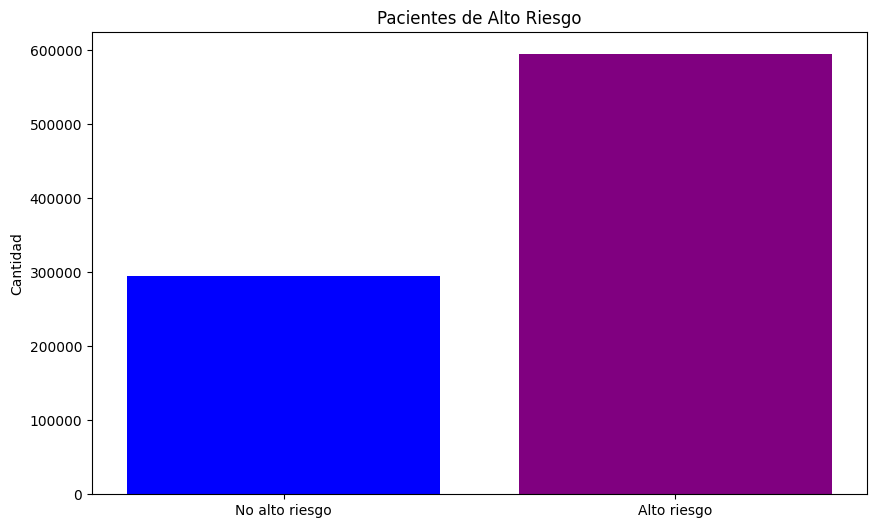

No alto riesgo: 295,532
Alto riesgo: 594,468


In [200]:
conteo = df["high_risk_patient"].value_counts().sort_index()
plt.figure(figsize=(10, 6))
etiquetas = ['No alto riesgo', 'Alto riesgo']
valores = conteo.values
colores = ['blue', 'purple']
plt.bar(etiquetas, valores, color=colores)
plt.title('Pacientes de Alto Riesgo')
plt.ylabel('Cantidad')
plt.show()
print(f"No alto riesgo: {conteo[0]:,}")
print(f"Alto riesgo: {conteo[1]:,}")

3. Variable **Grupo por edad**

Con el fin de analizar mejor el comportamiento del cancer segun la edad, se creó una nueva variable que agrupa la edad de los pacientes segun su ciclo de vida. Esta clasificación permite observar patrones y diferencias entre grupos y asi nos facilita saber que edades son mas propensas a tener cancer

In [201]:
def clasificar_edad(edad):
    if edad < 13:
        return "Niño"
    elif edad < 18:
        return "Adolescente"
    elif edad < 50:
        return "Adulto"
    else:
        return "Adulto Mayor"
df["age_group"] = df["age"].apply(clasificar_edad)
print(df["age_group"].head(20))
print()

0     Adulto Mayor
1     Adulto Mayor
2     Adulto Mayor
3     Adulto Mayor
4           Adulto
5     Adulto Mayor
6           Adulto
7     Adulto Mayor
8     Adulto Mayor
9     Adulto Mayor
10          Adulto
11          Adulto
12    Adulto Mayor
13    Adulto Mayor
14    Adulto Mayor
15          Adulto
16          Adulto
17          Adulto
18          Adulto
19    Adulto Mayor
Name: age_group, dtype: object



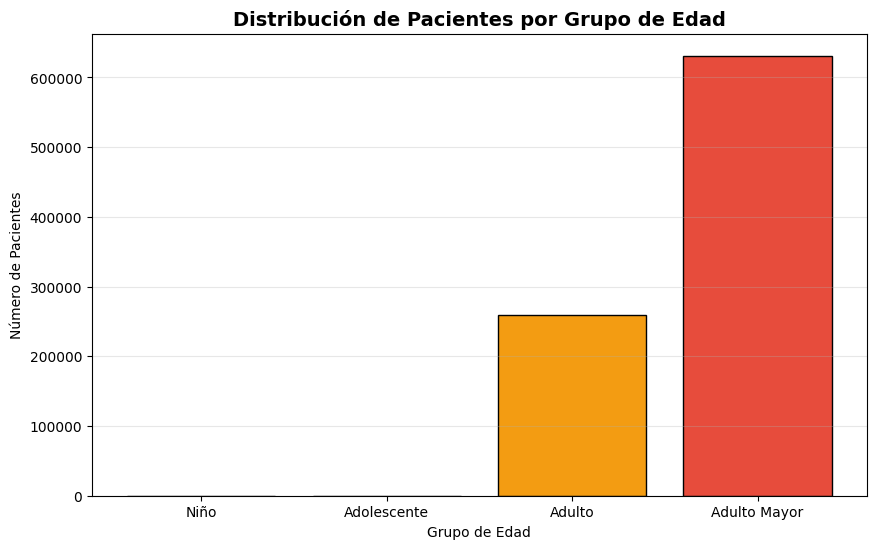

In [202]:
conteo = df["age_group"].value_counts()
orden = ['Niño', 'Adolescente', 'Adulto', 'Adulto Mayor']
conteo = conteo.reindex(orden)

plt.figure(figsize=(10, 6))
colores = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c', '#9b59b6']
plt.bar(orden, conteo.values, color=colores, edgecolor='black')

plt.title('Distribución de Pacientes por Grupo de Edad', fontsize=14, fontweight='bold')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Pacientes')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [203]:
#Como no se alcanzan a ver bien las variables de adolescente y niño , hacemos un resumen para ver con mas claridad los datos.
print("RESUMEN:")
for grupo in orden:
    print(f"{grupo}: {conteo[grupo]:,} pacientes")

RESUMEN:
Niño: 9 pacientes
Adolescente: 67 pacientes
Adulto: 258,841 pacientes
Adulto Mayor: 631,083 pacientes


# 6. Filtrado y condiciones en Pandas:
En esta sección aplicaremos filtros y condiciones con Pandas para extraer información relevante del dataset.
Estos análisis nos permitirán identificar patrones, comparar grupos y obtener cinco resultados clave, cada uno acompañado de una breve conclusión.

In [204]:
#1. Comparación de personas que vivieron o no
df["survived"].value_counts(normalize=True) * 100

,proportion
survived,
0,77.977079
1,22.022921


Podemos observar que el 77% de los pacientes no sobrevivieron, esto quiere decir que el cancer es muy mortal.

In [205]:
#2. En el primero filtro buscamos analizar como personas menores de 40 que se considera una corta edad tienen un cancer avanzado
df_filtro1=df[(df['age']<40)&(df['cancer_stage'].isin(["stage iii","stage iv"]))]
df_filtro1

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,years_since_diagnosis,comorbidity_index,high_risk_patient,age_group
29,30,36.0,female,germany,2014-07-24,stage iv,no,former smoker,31.8,298,...,0,0,0,combined,2016-04-18,0,11.3,0,1,Adulto
98,99,39.0,female,latvia,2014-12-08,stage iv,no,former smoker,41.6,259,...,0,0,0,radiation,2015-06-09,0,11.0,1,1,Adulto
123,124,38.0,male,netherlands,2023-11-19,stage iii,no,former smoker,20.9,186,...,1,0,0,combined,2024-10-04,1,2.0,2,1,Adulto
132,133,35.0,female,slovenia,2018-09-21,stage iv,no,current smoker,16.5,210,...,0,0,0,surgery,2019-07-21,0,7.2,0,1,Adulto
174,175,37.0,male,bulgaria,2019-02-20,stage iv,yes,passive smoker,40.4,265,...,1,1,0,surgery,2019-11-25,0,6.8,2,1,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889878,889879,36.0,male,netherlands,2018-12-16,stage iv,yes,former smoker,18.9,223,...,0,1,1,combined,2020-05-28,0,6.9,3,1,Adulto
889885,889886,34.0,male,belgium,2022-08-14,stage iv,yes,passive smoker,31.8,294,...,1,0,0,surgery,2023-03-07,1,3.3,2,1,Adulto
889889,889890,37.0,male,czech republic,2018-06-30,stage iv,yes,never smoked,31.0,270,...,1,0,0,surgery,2019-07-06,0,7.4,2,1,Adulto
889930,889931,39.0,male,france,2017-08-26,stage iii,no,never smoked,21.1,151,...,0,1,0,combined,2018-10-31,0,8.2,2,1,Adulto


Podemos observar con este filtro que 26.932 personas jovenes(menores de 40), estan en una etapa de cancer avanzado, quiere decir que las personas jovenes no suelen desarrollar el cancer tan rapido

In [206]:
#3. Pacientes con historial familiar, que fumaron en algun momento de su vida y no sobrevivieron
f2 = df[(df["family_history"] == "yes") & (df["smoking_status"] != "never smoked") & (df["survived"] == 0)]
f2

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,years_since_diagnosis,comorbidity_index,high_risk_patient,age_group
0,1,64.0,male,sweden,2016-04-05,stage i,yes,passive smoker,29.4,199,...,0,1,0,chemotherapy,2017-09-10,0,9.6,1,0,Adulto Mayor
2,3,65.0,female,hungary,2023-04-05,stage iii,yes,former smoker,44.0,268,...,1,0,0,combined,2024-04-09,0,2.6,2,1,Adulto Mayor
7,8,51.0,male,denmark,2017-02-18,stage iv,yes,former smoker,25.8,195,...,1,0,0,combined,2017-08-26,0,8.8,2,1,Adulto Mayor
8,9,64.0,male,sweden,2021-03-21,stage iii,yes,current smoker,21.5,236,...,0,0,0,chemotherapy,2022-03-07,0,4.7,0,0,Adulto Mayor
9,10,56.0,male,hungary,2021-11-30,stage iv,yes,current smoker,17.3,183,...,0,0,1,surgery,2023-11-29,0,4.0,2,1,Adulto Mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889982,889983,43.0,female,hungary,2016-06-13,stage iii,yes,current smoker,27.6,239,...,1,0,0,surgery,2018-01-02,0,9.4,2,1,Adulto
889994,889995,55.0,male,italy,2018-03-27,stage iii,yes,former smoker,26.8,154,...,0,0,0,radiation,2019-04-23,0,7.7,0,0,Adulto Mayor
889996,889997,62.0,female,cyprus,2015-09-27,stage ii,yes,former smoker,21.6,240,...,0,0,0,surgery,2017-06-19,0,10.2,0,0,Adulto Mayor
889998,889999,67.0,female,slovakia,2015-12-22,stage iv,yes,former smoker,18.6,194,...,1,0,0,chemotherapy,2017-12-12,0,9.9,2,1,Adulto Mayor


Hay 260.068 pacientes que tenían una combinación de factores de alto riesgo (historial familiar de cáncer y hábito de fumar en algún momento de su vida) y  no sobrevivieron.

In [207]:
#4. Quien fumaba y aun asi sobrevivio
sobrevivientes = df[(df["smoking_status"] == "current smoker") & (df["survived"] == 1)]
sobrevivientes

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,years_since_diagnosis,comorbidity_index,high_risk_patient,age_group
32,33,61.0,male,netherlands,2014-10-09,stage iii,yes,current smoker,34.6,249,...,0,0,0,chemotherapy,2016-02-17,1,11.1,1,0,Adulto Mayor
41,42,49.0,female,germany,2016-04-10,stage iv,yes,current smoker,28.0,186,...,0,0,1,chemotherapy,2016-10-27,1,9.6,1,1,Adulto
53,54,51.0,female,estonia,2014-08-25,stage iii,no,current smoker,21.0,151,...,1,0,1,combined,2015-03-02,1,11.2,3,1,Adulto Mayor
68,69,65.0,female,lithuania,2023-08-30,stage ii,no,current smoker,23.8,212,...,1,0,1,surgery,2024-10-08,1,2.2,2,1,Adulto Mayor
84,85,44.0,male,ireland,2021-04-30,stage i,yes,current smoker,36.0,245,...,1,0,0,radiation,2022-05-06,1,4.6,2,1,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889891,889892,43.0,female,netherlands,2018-09-25,stage iv,no,current smoker,38.3,248,...,0,1,1,radiation,2020-01-26,1,7.2,3,1,Adulto
889892,889893,50.0,female,portugal,2017-05-13,stage iii,no,current smoker,41.8,248,...,0,0,0,combined,2017-11-20,1,8.5,1,0,Adulto Mayor
889893,889894,50.0,female,bulgaria,2020-04-23,stage iii,no,current smoker,43.6,255,...,1,0,0,chemotherapy,2021-06-03,1,5.6,2,1,Adulto Mayor
889948,889949,52.0,female,ireland,2015-08-01,stage i,yes,current smoker,22.9,175,...,1,0,0,radiation,2016-10-17,1,10.3,2,1,Adulto Mayor


Observamos que 48.893 personas que fumaban con frecuencia, pudieron sobrevivir al cancer.

In [208]:
#5. Adultos que nunca fumaron y se diagnosticaron con cancer.
adultos_nofuman= df[(df["age"]>60) & (df["smoking_status"]=="never smoked")]
adultos_nofuman

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,years_since_diagnosis,comorbidity_index,high_risk_patient,age_group
61,62,64.0,male,netherlands,2021-06-29,stage iv,yes,never smoked,37.1,288,...,1,0,0,surgery,2022-03-24,0,4.4,2,1,Adulto Mayor
64,65,64.0,female,estonia,2023-11-29,stage iii,yes,never smoked,21.2,151,...,0,0,1,combined,2025-01-06,0,2.0,2,1,Adulto Mayor
66,67,70.0,female,hungary,2023-11-21,stage iii,yes,never smoked,32.1,263,...,1,0,0,radiation,2025-05-04,0,2.0,2,1,Adulto Mayor
72,73,78.0,female,portugal,2016-04-27,stage i,no,never smoked,36.0,274,...,0,0,0,surgery,2017-05-23,1,9.6,1,1,Adulto Mayor
77,78,62.0,female,germany,2023-09-06,stage iii,no,never smoked,26.9,236,...,0,0,0,surgery,2024-05-29,0,2.2,1,0,Adulto Mayor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889933,889934,65.0,male,latvia,2021-11-10,stage iv,yes,never smoked,40.9,278,...,1,1,0,combined,2022-06-28,1,4.0,3,1,Adulto Mayor
889939,889940,71.0,male,ireland,2016-02-12,stage i,yes,never smoked,16.6,162,...,0,0,0,chemotherapy,2017-07-01,1,9.8,0,1,Adulto Mayor
889988,889989,74.0,male,finland,2023-01-10,stage ii,yes,never smoked,36.4,269,...,0,0,0,radiation,2024-01-25,1,2.9,1,1,Adulto Mayor
889991,889992,67.0,female,italy,2015-06-25,stage iii,yes,never smoked,33.6,246,...,1,0,0,chemotherapy,2016-09-07,0,10.4,1,0,Adulto Mayor


A pesar de no haber fumado, 64.984 adultos mayores fueron diagnosticados con cáncer, lo que demuestra que existen otros factores de riesgo además del tabaquismo.

# 7. Agrupación con groupby:
En esta sección realizaremos agrupaciones con groupby() para descubrir patrones y relaciones importantes dentro del dataset.
A través de estas agrupaciones podremos comparar categorías, analizar comportamientos y obtener cinco resultados interesantes acompañados de su respectiva conclusión.

1. Nuestra primera agrupación será por el tiempo que el paciente recibio un tratamiento

In [209]:
# Nueva variable tiempo de tratamiento, que usaremos en el siguiente gropuby(en dias)
df["trat_dias"] = (df["end_treatment_date"] - df["diagnosis_date"]).dt.days
df.head(10)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,years_since_diagnosis,comorbidity_index,high_risk_patient,age_group,trat_dias
0,1,64.0,male,sweden,2016-04-05,stage i,yes,passive smoker,29.4,199,...,1,0,chemotherapy,2017-09-10,0,9.6,1,0,Adulto Mayor,523
1,2,50.0,female,netherlands,2023-04-20,stage iii,yes,passive smoker,41.2,280,...,0,0,surgery,2024-06-17,1,2.6,2,1,Adulto Mayor,424
2,3,65.0,female,hungary,2023-04-05,stage iii,yes,former smoker,44.0,268,...,0,0,combined,2024-04-09,0,2.6,2,1,Adulto Mayor,370
3,4,51.0,female,belgium,2016-02-05,stage i,no,passive smoker,43.0,241,...,0,0,chemotherapy,2017-04-23,0,9.8,2,1,Adulto Mayor,443
4,5,37.0,male,luxembourg,2023-11-29,stage i,no,passive smoker,19.7,178,...,0,0,combined,2025-01-08,0,2.0,0,0,Adulto,406
5,6,50.0,male,italy,2023-01-02,stage i,no,never smoked,37.6,274,...,0,0,radiation,2024-12-27,0,2.9,1,0,Adulto Mayor,725
6,7,49.0,female,croatia,2018-05-21,stage iii,yes,passive smoker,43.1,259,...,0,0,radiation,2019-05-06,1,7.5,0,0,Adulto,350
7,8,51.0,male,denmark,2017-02-18,stage iv,yes,former smoker,25.8,195,...,0,0,combined,2017-08-26,0,8.8,2,1,Adulto Mayor,189
8,9,64.0,male,sweden,2021-03-21,stage iii,yes,current smoker,21.5,236,...,0,0,chemotherapy,2022-03-07,0,4.7,0,0,Adulto Mayor,351
9,10,56.0,male,hungary,2021-11-30,stage iv,yes,current smoker,17.3,183,...,0,1,surgery,2023-11-29,0,4.0,2,1,Adulto Mayor,729


In [210]:
df.groupby("survived")["trat_dias"].mean()

,trat_dias
survived,
0,458.138345
1,457.905971


In [211]:
a= 458.138345 - 457.905971
a

0.23237399999999298

Al analizar esta agrupación observamos que la diferencia en la duración del tratamiento entre quienes sobreviven y quienes no es mínima ( 23 horas). Esto indica que el tiempo total de tratamiento no parece influir de manera relevante en la supervivencia.

2. Para nuestra segunda agrupación , queremos observar si hay algun tratamiento que sea más eficiente que otros.

In [212]:
tratamiento_eficaz = df.groupby("treatment_type")["survived"].value_counts(normalize=True) * 100
tratamiento_eficaz

treatment_type  survived
chemotherapy    0           78.126148
                1           21.873852
combined        0           77.987413
                1           22.012587
radiation       0           77.944293
                1           22.055707
surgery         0           77.850140
                1           22.149860
Name: proportion, dtype: float64

Podemos observar que la supervivencia es menor en los pacientes tratados con quimioterapia, mientras que los que reciben cirugía presentan una mayor tasa de supervivencia.

3. Ahora queremos analizar la edad promedio que tiene cada etapa del cancer.

In [213]:
promedio_por_etapa = df.groupby("cancer_stage")["age"].mean().sort_values(ascending=False)
promedio_por_etapa

,age
cancer_stage,
stage iii,55.023801
stage iv,55.011055
stage ii,55.000360
stage i,54.992805


In [214]:
desviacion_por_etapa = df.groupby("cancer_stage")["age"].std().sort_values(ascending=False)
desviacion_por_etapa


,age
cancer_stage,
stage iii,10.005944
stage iv,9.994526
stage i,9.990937
stage ii,9.986551


La desviación estándar nos dice que la mayoría de los pacientes, sin importar la etapa, presentan edades que varían aproximadamente mas o menos 10 años respecto al promedio(55 años).
Por lo tanto, la edad muestra una dispersión parecida en todas las etapas, es decir que la edad no es una variable demasiado significativa.

4. Para nuestra cuarta agrupación queremos ver si hasy mas probabilidades de supervivencia dependiendo el género.

In [215]:
genero_vom=df.groupby("gender")["survived"].value_counts(normalize=True) * 100
genero_vom

gender  survived
female  0           78.008659
        1           21.991341
male    0           77.945518
        1           22.054482
Name: proportion, dtype: float64

Tanto hombres como mujeres presentan tasas de supervivencia muy similares (aprox. 22%), lo que sugiere que el género no tiene un impacto notable en los resultados clínicos.

5. Para nuestra ultima agrupación nos parece interesante si el hábito de fumar o no, influye en mi tasa de mortalidad

In [216]:
fumador=df.groupby("smoking_status")["survived"].value_counts(normalize=True).mul(100)
fumador

smoking_status  survived
current smoker  0           77.966002
                1           22.033998
former smoker   0           78.035926
                1           21.964074
never smoked    0           77.908966
                1           22.091034
passive smoker  0           77.997491
                1           22.002509
Name: proportion, dtype: float64

Las tasas de supervivencia son muy similares entre todos los tipos de fumadores, con variaciones mínimas alrededor del 22%. Esto indica que, dentro de este dataset, el hábito de fumar no muestra diferencias marcadas en la probabilidad de supervivencia.

# Paso 8 Visualizaciones:

Dado que a lo largo de nuestro analísis incluimos bastantes graficos para expresar de manera clara nuestro proyecto.

Entonces añadiremos nada más un grafico que nos parecio interesante de exponer.

Queremos hacer una comparativa de si es mas probable que muera un adulto mayor que nunca fumo, o un joven con habitos de fumar.
primero debemos crear los grupos que compararemos:

-jovenes que fuman

-adultos que no fuman

In [217]:
jovenes_fuman= df[(df["age"]<40) & (df["smoking_status"]=="current smoker")]
jovenes_fuman

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,years_since_diagnosis,comorbidity_index,high_risk_patient,age_group,trat_dias
132,133,35.0,female,slovenia,2018-09-21,stage iv,no,current smoker,16.5,210,...,0,0,surgery,2019-07-21,0,7.2,0,1,Adulto,303
234,235,39.0,female,estonia,2019-11-05,stage i,no,current smoker,19.1,200,...,0,0,chemotherapy,2021-10-29,0,6.0,0,0,Adulto,724
239,240,38.0,male,latvia,2016-10-23,stage ii,yes,current smoker,41.7,243,...,1,0,combined,2018-08-18,0,9.1,2,1,Adulto,664
565,566,37.0,female,slovakia,2023-06-26,stage iii,no,current smoker,23.7,223,...,0,0,combined,2024-12-04,0,2.4,0,0,Adulto,527
597,598,35.0,male,malta,2023-04-25,stage ii,yes,current smoker,26.2,154,...,1,0,combined,2024-12-22,0,2.6,2,1,Adulto,607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889507,889508,38.0,male,bulgaria,2021-09-30,stage i,yes,current smoker,38.7,248,...,0,0,surgery,2023-03-01,0,4.1,2,1,Adulto,517
889627,889628,36.0,female,belgium,2022-01-24,stage iii,yes,current smoker,37.9,253,...,1,0,combined,2023-11-28,0,3.8,2,1,Adulto,673
889666,889667,36.0,female,czech republic,2020-04-01,stage i,yes,current smoker,21.9,229,...,0,0,radiation,2021-12-28,0,5.6,1,0,Adulto,636
889768,889769,39.0,female,slovenia,2017-10-02,stage ii,no,current smoker,20.9,202,...,0,0,surgery,2019-05-29,0,8.1,1,0,Adulto,604


In [218]:
adultos_nofuman= df[(df["age"]>60) & (df["smoking_status"]=="never smoked")]
adultos_nofuman

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,years_since_diagnosis,comorbidity_index,high_risk_patient,age_group,trat_dias
61,62,64.0,male,netherlands,2021-06-29,stage iv,yes,never smoked,37.1,288,...,0,0,surgery,2022-03-24,0,4.4,2,1,Adulto Mayor,268
64,65,64.0,female,estonia,2023-11-29,stage iii,yes,never smoked,21.2,151,...,0,1,combined,2025-01-06,0,2.0,2,1,Adulto Mayor,404
66,67,70.0,female,hungary,2023-11-21,stage iii,yes,never smoked,32.1,263,...,0,0,radiation,2025-05-04,0,2.0,2,1,Adulto Mayor,530
72,73,78.0,female,portugal,2016-04-27,stage i,no,never smoked,36.0,274,...,0,0,surgery,2017-05-23,1,9.6,1,1,Adulto Mayor,391
77,78,62.0,female,germany,2023-09-06,stage iii,no,never smoked,26.9,236,...,0,0,surgery,2024-05-29,0,2.2,1,0,Adulto Mayor,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889933,889934,65.0,male,latvia,2021-11-10,stage iv,yes,never smoked,40.9,278,...,1,0,combined,2022-06-28,1,4.0,3,1,Adulto Mayor,230
889939,889940,71.0,male,ireland,2016-02-12,stage i,yes,never smoked,16.6,162,...,0,0,chemotherapy,2017-07-01,1,9.8,0,1,Adulto Mayor,505
889988,889989,74.0,male,finland,2023-01-10,stage ii,yes,never smoked,36.4,269,...,0,0,radiation,2024-01-25,1,2.9,1,1,Adulto Mayor,380
889991,889992,67.0,female,italy,2015-06-25,stage iii,yes,never smoked,33.6,246,...,0,0,chemotherapy,2016-09-07,0,10.4,1,0,Adulto Mayor,440


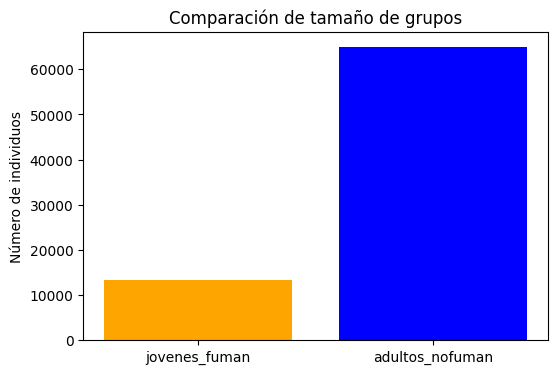

In [219]:
import matplotlib.pyplot as plt

groups = ['jovenes_fuman', 'adultos_nofuman']
sizes = [len(jovenes_fuman), len(adultos_nofuman)]

plt.figure(figsize=(6,4))
plt.bar(groups, sizes, color=['orange','blue'])
plt.title('Comparación de tamaño de grupos')
plt.ylabel('Número de individuos')
plt.show()

# 9. Conclusiones

- Basados en el analisis anterior, podemos concluir que el cigarrillo no es la causa principal del cáncer de pulmón, una vez que alguien ya tiene la enfermedad, el ser fumador, o nunca haber fumado casi no afecta nuestras posibilidades de vivir. Todos los grupos tienen una tasa de supervivencia muy parecida (22%).


- Otra conclusión es que aunque los adultos mayores nunca hayan fumado, su edad los hace mas propensos al desarrollo de cáncer de pulmón. Esto puede deberse a que, con el paso de los años pueden adquirir diversas enfermedades, lo cual debilita sus cuerpos o el estilo de vida que llevaron en su juventud, es decir sean ex fumadores o no , los adultos mayores son mucho mas propensos a desarrollar cancer de pulmon que un joven adicto al cigarrillo.


- En este conjunto de datos, la Cirugía ofrece las mejores probabilidades de supervivencia al paciente, cuenta con un porcentaje (22,15%) de supervivencia, mientras que la Quimioterapia ofrece los peoress resultados con una tasa de muertes del (78.13%), aunque la diferencia entre unos metodos y los otros no es mucha, cuando hablamos de vidas humanas son porcentajes valiosos asi que resaltamos la importancia de aplicar enfoques que incluyan el procedimiento quirúrgico.

- Determinamos que los pacientes de mayor riesgo son, en su mayoría, personas mayores de 70 años, con dos o más enfermedades adicionales y con un cáncer en etapa IV. También vimos algunos casos de pacientes jóvenes (menores de 40) que ya presentaban cáncer avanzado, así como pacientes con antecedentes familiares y hábitos como fumar indican que tanto la genética como el estilo de vida influyen de manera importante en la supervivencia.

- La base de datos muestra que la supervivencia es extremadamente baja y está determinada principalmente por la etapa del cáncer al ser detectado. Los tratamientos con cirugía muestran mejores resultados porque se aplican en fases tempranas. Se identifican dos grupos críticos: jóvenes con cáncer avanzado y pacientes con una combinación de historial familiar y tabaquismo, lo que muestra la urgencia de mejorar la detección temprana. La clave para que haya una menor taza de mortalidad es diagnosticar a tiempo y manejar las condiciones de alto riesgo del paciente, como la edad y las comorbilidades.
